In [34]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
# import matplotlib.pyplot as plt
import torch.optim as optim
import os
import copy
from torchsummary import summary
import queue
import copy
from PIL import Image
from torchvision import transforms
import models
print('done importing stuff')

done importing stuff


max in myimg:  tensor(0.4980)
min in myimg:  tensor(0.)
<PIL.PngImagePlugin.PngImageFile image mode=P size=512x512 at 0x20CAD1E8648>
<PIL.Image.Image image mode=L size=512x512 at 0x20CAD1E8688>
max in myimg:  tensor(0.4980)
min in myimg:  tensor(0.)
<PIL.Image.Image image mode=L size=512x512 at 0x20CAD1E8808>


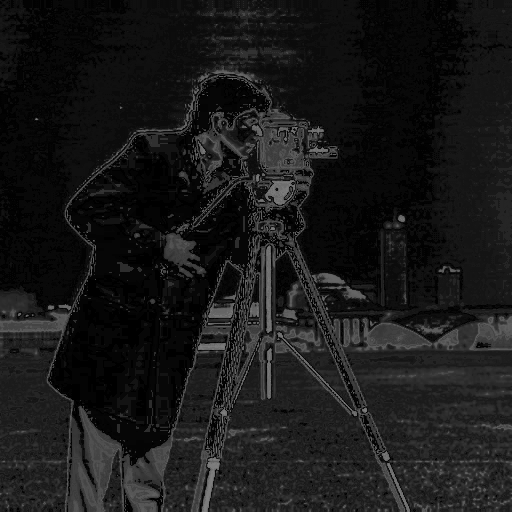

In [35]:
# look at image
myimg_path = '../cloud_data/cameraman.ppm'
myimg = Image.open(myimg_path)
# myimg.show()
myimg_tensor = transforms.ToTensor()(myimg).unsqueeze(0).type(torch.float)
# print(myimg_tensor.size())
print('max in myimg: ', torch.max(myimg_tensor))
print('min in myimg: ', torch.min(myimg_tensor))
print(myimg)
myimg_pil = transforms.ToPILImage()(myimg_tensor.squeeze(0))
print(myimg_pil)
myimg_tensor = transforms.ToTensor()(myimg_pil).unsqueeze(0).type(torch.float)
print('max in myimg: ', torch.max(myimg_tensor))
print('min in myimg: ', torch.min(myimg_tensor))
myimg_pil = transforms.ToPILImage()(myimg_tensor.squeeze(0))
print(myimg_pil)
display(myimg_pil)

# myconv = myconv.to(device)
myinput = torch.rand(1, 1, 512, 512).to(device)
mytarget = myimg_tensor.to(device)
# myimg_pil.show()

In [15]:
# set a device
device = torch.device('cpu')

In [16]:
# define loss function
mse = nn.MSELoss()

In [36]:
# create a model
myconv = models.UNet2D(1, 1, mid_channels = 16, depth = 6, kernel_size= 3, padding = 1, dilation = 1, sig_layer = False, bias = True) 
#DoubleConv2D(1, 1)#
myconv.to(device)

UNet2D(
  (inlayer): DoubleConv2D(
    (double_conv): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): ReLU(inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): ReLU(inplace=True)
      )
    )
  )
  (down1): Down2D(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv): DoubleConv2D(
      (double_conv): Sequential(
        (0): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
          (1): ReLU(inplace=True)
        )
        (1): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
          (1): ReLU(inplace=True)
        )
      )
    )
  )
  (down2): Down2D(
    (maxpool): MaxPool2d(kernel_size=2, stride

In [24]:
# define optimizer
myoptimizer = optim.SGD(myconv.parameters(), lr = 0.01, momentum = 0.5)

56
0 loss tensor(0.0257, grad_fn=<MseLossBackward>)
max in curr img:  tensor(-0.0337)
min in curr img:  tensor(-0.0364)


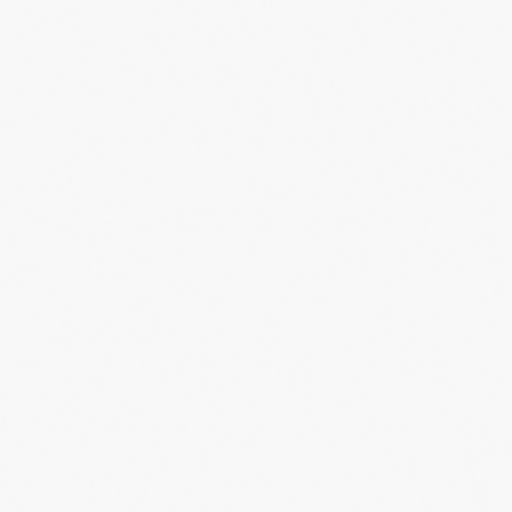

everything is good? True
10 loss tensor(0.0136, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0253)
min in curr img:  tensor(0.0229)


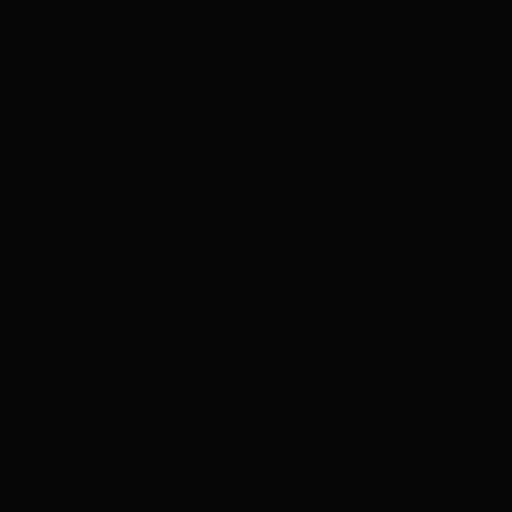

everything is good? True
20 loss tensor(0.0099, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0588)
min in curr img:  tensor(0.0571)


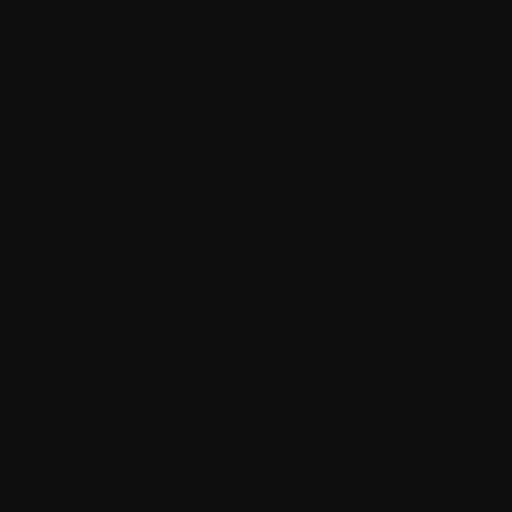

everything is good? True
30 loss tensor(0.0089, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0735)
min in curr img:  tensor(0.0722)


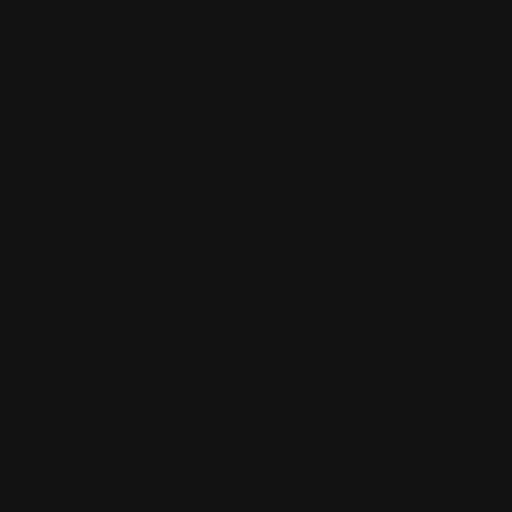

everything is good? True
40 loss tensor(0.0086, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0826)
min in curr img:  tensor(0.0813)


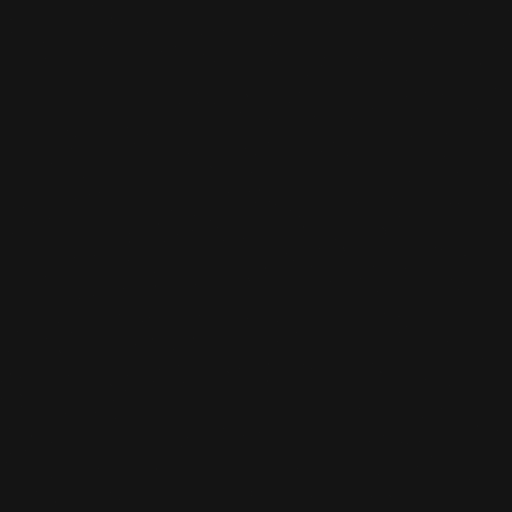

everything is good? True
50 loss tensor(0.0085, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0881)
min in curr img:  tensor(0.0868)


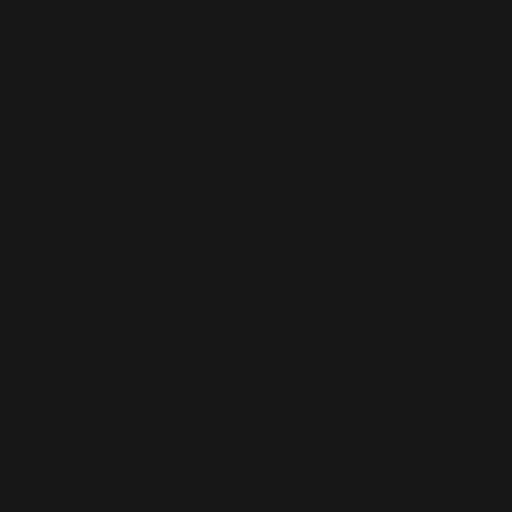

everything is good? True
60 loss tensor(0.0084, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0916)
min in curr img:  tensor(0.0902)


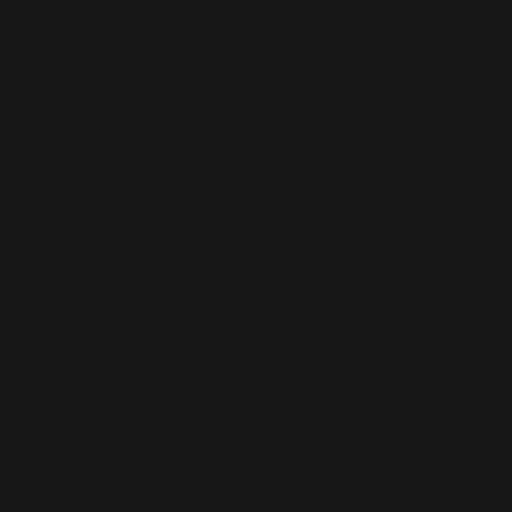

everything is good? True
70 loss tensor(0.0084, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0938)
min in curr img:  tensor(0.0924)


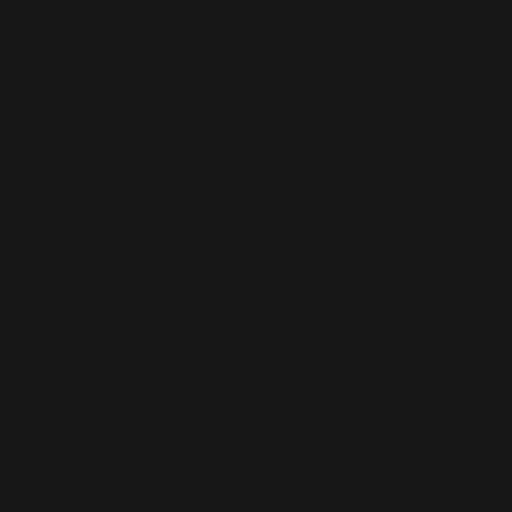

everything is good? True
80 loss tensor(0.0084, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0950)
min in curr img:  tensor(0.0937)


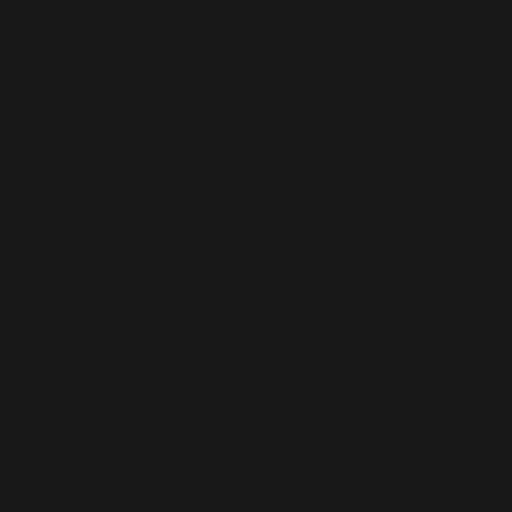

everything is good? True
90 loss tensor(0.0084, grad_fn=<MseLossBackward>)
max in curr img:  tensor(0.0959)
min in curr img:  tensor(0.0945)


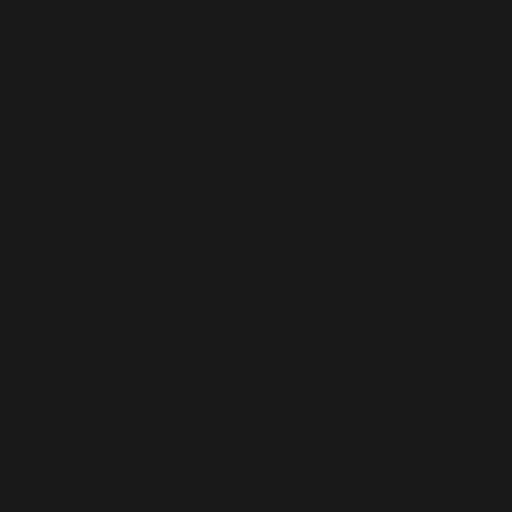

everything is good? True


In [25]:
# start overfitting
myconv.train()
num_iter = 100
check_every = 10
print_every = 10
print(len(list(myconv.parameters())))
# curr_params = copy.deepcopy(list(myconv.parameters())) #and b = list(model.parameters())
curr_states = copy.deepcopy(myconv.state_dict())
for i in range(num_iter):
    param = myconv.parameters()
    old_gradients = [param.grad for param in myconv.parameters()]
    # for j in range(len(list(myconv.parameters()))):
    #     old.gradient
    myoutput = myconv(myinput)
    loss = mse(myoutput, mytarget)
    myoptimizer.zero_grad()
    loss.backward()
    myoptimizer.step()

    if i % print_every == 0:
        print(i, 'loss', loss)
        curr_output = myoutput.detach()
        curr_img = transforms.ToPILImage()(curr_output.squeeze(0))
        print('max in curr img: ', torch.max(curr_output))
        print('min in curr img: ', torch.min(curr_output))
        display(curr_img)

    if i % check_every == 0:
        everything_is_good = True
        new_gradients = [param.grad for param in myconv.parameters()]
        # print('old gradients:', old_gradients)
        # print('new gradients:', new_gradients)
        for grad in new_gradients:
            if grad == None:
                raise ValueError('found grad none')
                # everything_is_good = False

        new_states = copy.deepcopy(myconv.state_dict())
        for state_name in new_states:
            old_state = curr_states[state_name]
            new_state = new_states[state_name]
            if torch.equal(old_state, new_state):
                # print(state_name, 'not changed')
                everything_is_good = False
        print('everything is good?', everything_is_good)